## Convolutional Neural Networks

In this assignment, we will learn about convolutional neural networks. We will create a CNN and learn to classify image data.

In this lecture, we will use the image data generator to classify our data. The data is loaded below:

In [31]:
!pip install tensorflow-gpu
!pip install tf-nightly

     |████████████████████████████████| 394.7MB 45kB/s 


     |████████████████████████████████| 399.9MB 42kB/s 
     |████████████████████████████████| 471kB 57.1MB/s 
     |████████████████████████████████| 4.0MB 57.9MB/s 
     |████████████████████████████████| 12.2MB 260kB/s 
     |████████████████████████████████| 4.0MB 53.2MB/s 
ERROR: tensorflow 2.4.0 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.0 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.0 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.0 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.0 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
   

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
train_data_dir = '/content/drive/MyDrive/dogs-vs-cats-processed/dogs-vs-cats-processed/train'
validation_data_dir = '/content/drive/MyDrive/dogs-vs-cats-processed/dogs-vs-cats-processed/test'

img_width, img_height = 150, 150
batch_size = 80

In [13]:
#This block of code is used to ensure the input shape is correct

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Define a train data generator with shear range of 0.3, zoom range of 0.1 and rescale to 1./255 (note that we must make 1 a float to produce a correct fraction). Use the ImageDataGenerator function.

In [4]:
# Answer below:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.1,
    horizontal_flip=True
)

Define a test data generator that only rescales to 1./255. Use the ImageDataGenerator function.

In [5]:
# Answer below:
test_datagen = ImageDataGenerator(rescale=1./255)

The train generator and the test generator are defined below:

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #shuffle=False,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


We'll start with a simple model. In CNNs, we first convolve the to extract features and then we add the dense layers. 

Create a model with one layer of convolution of size 64, one layer of activation, one layer of max pooling with pool size (2,2) and then one flattening layer, one dense layer of unit size 64 with a ReLU activation and one dense output layer. The output layer should have a sigmoid activation.

In [8]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [38]:
# Answer below:
with tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattening
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation("relu"))
    # regularization
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation("relu"))

Compile the model using RMSprop.

In [39]:
# Answer below:
nb_train_samples = 2000
nb_test_samples = 800
epochs = 50
batch_size = 4

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Fit the model using a fit generator. Use 50 epochs, 25 training steps and 15 validation steps

In [40]:
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.4.0
/device:GPU:0
Num GPUs Available:  1


In [43]:
# Answer below:
import time

start = time.time()
with tf.device('/device:GPU:0'):
    m1_hist = model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=5)
m1_time = time.time() - start

Epoch 1/50
25/25 [==============================] - 17s 662ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 8.1202 - val_accuracy: 0.4675
Epoch 2/50
25/25 [==============================] - 17s 662ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 16s 657ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6627 - val_accuracy: 0.4975
Epoch 4/50
25/25 [==============================] - 17s 664ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.7771 - val_accuracy: 0.4900
Epoch 5/50
25/25 [==============================] - 16s 659ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.3196 - val_accuracy: 0.5200
Epoch 6/50
25/25 [==============================] - 16s 657ms/step - loss: 7.6170 - accuracy: 0.5005 - val_loss: 7.4340 - val_accuracy: 0.5125
Epoch 7/50
25/25 [==============================] - 17s 664ms/step - loss: 7.6323 - accuracy: 0.4995 - val_loss: 7.7771 - val_accuracy: 0.4900

Create a new model by adding an additional group of convolution, activation and max pooling layers before the flatten layer. Make the convolution layer of unit size 32. Keep everything else the same.

In [44]:
# Answer below:
with tf.device(":/device:GPU:0"):
    m2 = Sequential()
    m2.add(Conv2D(64, (3,3), input_shape=input_shape))
    m2.add(Activation("relu"))
    m2.add(MaxPooling2D(pool_size=(2,2)))
    # second group
    m2.add(Conv2D(32, (3,3)))
    m2.add(Activation("relu"))
    m2.add(MaxPooling2D(pool_size=(2,2)))
    # flattening
    m2.add(Flatten())
    m2.add(Dense(64))
    m2.add(Activation("relu"))
    # regularization
    m2.add(Dropout(0.5))
    m2.add(Dense(1))
    m2.add(Activation("relu"))

Fit and compile the model in the same way you did with the previous model. How did the results improve?

In [47]:
# Answer below:
m2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
with tf.device(":/device:GPU:0"):
    start = time.time()
    m2_hist = m2.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=5)
    m2_time = time.time() - start

Epoch 1/50
25/25 [==============================] - 17s 663ms/step - loss: 6.6625 - accuracy: 0.5138 - val_loss: 7.5102 - val_accuracy: 0.5075
Epoch 2/50
25/25 [==============================] - 16s 653ms/step - loss: 7.8756 - accuracy: 0.4835 - val_loss: 7.4340 - val_accuracy: 0.5125
Epoch 3/50
25/25 [==============================] - 16s 656ms/step - loss: 7.7891 - accuracy: 0.4892 - val_loss: 7.9296 - val_accuracy: 0.4800
Epoch 4/50
25/25 [==============================] - 16s 654ms/step - loss: 7.4119 - accuracy: 0.5140 - val_loss: 7.7771 - val_accuracy: 0.4900
Epoch 5/50
25/25 [==============================] - 16s 651ms/step - loss: 7.5198 - accuracy: 0.5069 - val_loss: 7.5484 - val_accuracy: 0.5050
Epoch 6/50
25/25 [==============================] - 16s 651ms/step - loss: 7.7383 - accuracy: 0.4925 - val_loss: 7.5865 - val_accuracy: 0.5025
Epoch 7/50
25/25 [==============================] - 16s 654ms/step - loss: 7.6312 - accuracy: 0.4996 - val_loss: 7.8152 - val_accuracy: 0.4875

Create a new model based on the model above. Add an additional dense layer of size 64 with a ReLU activation after the flatten layer.

In [48]:
# Answer below:
with tf.device(":/device:GPU:0"):
    m3 = Sequential()
    m3.add(Conv2D(64, (3,3), input_shape=input_shape))
    m3.add(Activation("relu"))
    m3.add(MaxPooling2D(pool_size=(2,2)))
    # second group
    m3.add(Conv2D(32, (3,3)))
    m3.add(Activation("relu"))
    m3.add(MaxPooling2D(pool_size=(2,2)))
    # flattening
    m3.add(Flatten())
    m3.add(Dense(64))
    m3.add(Activation("relu"))
    # third group
    m3.add(Dense(64))
    m3.add(Activation("relu"))
    # regularization
    m3.add(Dropout(0.5))
    m3.add(Dense(1))
    m3.add(Activation("relu"))

Fit and compile in the same way as above. Describe the difference in performance and speed.

In [49]:
# Answer below:
m3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
with tf.device(":/device:GPU:0"):
    start = time.time()
    m3_hist = m3.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=5)
    m3_time = time.time() - start

Epoch 1/50
25/25 [==============================] - 17s 675ms/step - loss: 7.3626 - accuracy: 0.4796 - val_loss: 7.3578 - val_accuracy: 0.5175
Epoch 2/50
25/25 [==============================] - 17s 661ms/step - loss: 7.4059 - accuracy: 0.5116 - val_loss: 7.5484 - val_accuracy: 0.5050
Epoch 3/50
25/25 [==============================] - 16s 652ms/step - loss: 7.4186 - accuracy: 0.5132 - val_loss: 7.5865 - val_accuracy: 0.5025
Epoch 4/50
25/25 [==============================] - 16s 649ms/step - loss: 7.1280 - accuracy: 0.5314 - val_loss: 7.3959 - val_accuracy: 0.5150
Epoch 5/50
25/25 [==============================] - 16s 651ms/step - loss: 7.5551 - accuracy: 0.5042 - val_loss: 7.5865 - val_accuracy: 0.5025
Epoch 6/50
25/25 [==============================] - 16s 649ms/step - loss: 7.3496 - accuracy: 0.5172 - val_loss: 7.5865 - val_accuracy: 0.5025
Epoch 7/50
25/25 [==============================] - 16s 653ms/step - loss: 7.4625 - accuracy: 0.5066 - val_loss: 7.3196 - val_accuracy: 0.5200

Fit and compile using the Adam optimizer. Describe the difference in performance between the Adam and RMSprop optimizers.

In [50]:
# adam opt
m3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
with tf.device(":/device:GPU:0"):
    start = time.time()
    m4_hist = m3.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=5)
    m4_time = time.time() - start

Epoch 1/50
25/25 [==============================] - 17s 667ms/step - loss: 0.8049 - accuracy: 0.7902 - val_loss: 1.4321 - val_accuracy: 0.7050
Epoch 2/50
25/25 [==============================] - 16s 657ms/step - loss: 0.7075 - accuracy: 0.8213 - val_loss: 0.9892 - val_accuracy: 0.7200
Epoch 3/50
25/25 [==============================] - 16s 653ms/step - loss: 0.5309 - accuracy: 0.7745 - val_loss: 1.1564 - val_accuracy: 0.7125
Epoch 4/50
25/25 [==============================] - 16s 648ms/step - loss: 0.4850 - accuracy: 0.8271 - val_loss: 1.4652 - val_accuracy: 0.7275
Epoch 5/50
25/25 [==============================] - 16s 653ms/step - loss: 0.4509 - accuracy: 0.8257 - val_loss: 1.3916 - val_accuracy: 0.7000
Epoch 6/50
25/25 [==============================] - 16s 656ms/step - loss: 0.4877 - accuracy: 0.8090 - val_loss: 1.3998 - val_accuracy: 0.6825
Epoch 7/50
25/25 [==============================] - 16s 653ms/step - loss: 0.4928 - accuracy: 0.8208 - val_loss: 1.0521 - val_accuracy: 0.7125

In [51]:
d = {"RMSProp_base" : m1_hist.history["accuracy"],
     "RMSProp_+1" : m2_hist.history["accuracy"],
     "RMSProp_+1+D" : m3_hist.history["accuracy"],
     "Adam" : m4_hist.history["accuracy"]}
results = pd.DataFrame(
    data=d)

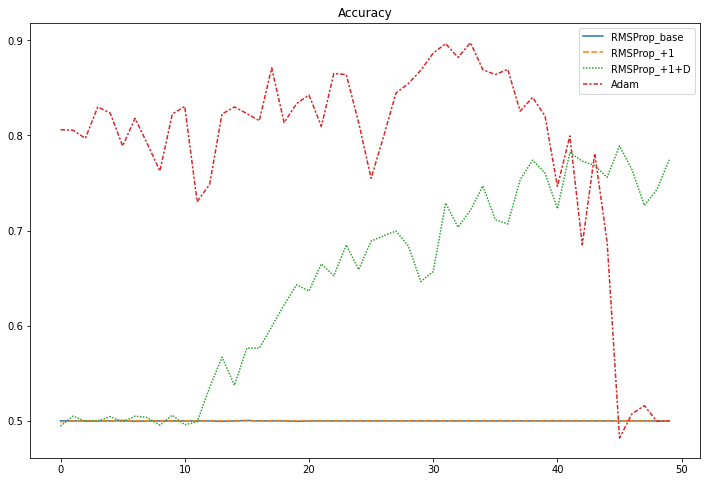

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("Accuracy")
sns.lineplot(data=results)
plt.show()

In [53]:
runtime = pd.DataFrame(index=["RMSProp_base", "RMSProp_+1", "RMSProp_+1+D", "Adam"],
                       data={"runtime" : [m1_time, m2_time, m3_time, m4_time]})
runtime.head()

,runtime
RMSProp_base,826.688099
RMSProp_+1,817.998547
RMSProp_+1+D,818.175227
Adam,822.419061
